In [1]:
import pandas as pd

# For loading data as Pandas Dataframe
import numpy as np

# For performing Matrix Calculations
import seaborn as sns

# For visualizing statistical results
import scipy.stats as s

# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For evaluating the performance of the model

In [2]:
data = pd.read_excel("fitur_combined.xlsx")
data

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,66.258988,61.227073,67.783226,65.158415,2.446483,0.055664,0.356445,0.263221,47.929862,72.003950,1.502277,1
1,64.446686,55.173210,58.302508,56.017323,0.943396,0.061523,0.308594,0.270054,41.226092,66.227144,1.606438,1
2,62.692141,99.537279,79.573600,75.421263,3.571429,0.042969,0.290039,0.286273,56.264081,128.622281,2.286046,1
3,63.433824,92.245610,64.134624,60.074981,4.487179,0.056641,0.389648,0.316059,45.349569,121.406513,2.677126,1
4,62.803729,58.825938,82.869466,79.547163,2.258065,0.047852,0.297852,0.333677,58.597402,58.808881,1.003609,1
...,...,...,...,...,...,...,...,...,...,...,...,...
375,77.975022,115.369311,47.334256,36.668310,18.783069,0.041992,0.237305,1.660196,33.469633,159.627078,4.769311,0
376,61.620302,129.153809,107.123572,97.890381,20.469799,0.061523,0.225586,0.217286,75.747572,166.099565,2.192804,0
377,79.215083,121.597106,57.423703,47.552360,16.492147,0.066406,0.249023,3.201225,40.600369,166.697921,4.105823,0
378,69.334370,137.593830,121.752307,112.744990,13.636364,0.085938,0.200195,1.629231,86.090591,174.288084,2.024473,0


In [3]:
data_columns = data.columns
data_columns

Index(['HR', 'SDNN', 'RMSSD', 'SDSD', 'pNN50', 'LF', 'HF', 'LF/HF', 'SD1',
       'SD2', 'SD_ratio', 'Label'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        380 non-null    float64
 1   SDNN      380 non-null    float64
 2   RMSSD     380 non-null    float64
 3   SDSD      380 non-null    float64
 4   pNN50     380 non-null    float64
 5   LF        380 non-null    float64
 6   HF        380 non-null    float64
 7   LF/HF     380 non-null    float64
 8   SD1       380 non-null    float64
 9   SD2       380 non-null    float64
 10  SD_ratio  380 non-null    float64
 11  Label     380 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 35.8 KB


In [5]:
data_copy = data.replace(to_replace=["0", "1"], value=[0, 1], inplace=False)
data_copy

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,66.258988,61.227073,67.783226,65.158415,2.446483,0.055664,0.356445,0.263221,47.929862,72.003950,1.502277,1
1,64.446686,55.173210,58.302508,56.017323,0.943396,0.061523,0.308594,0.270054,41.226092,66.227144,1.606438,1
2,62.692141,99.537279,79.573600,75.421263,3.571429,0.042969,0.290039,0.286273,56.264081,128.622281,2.286046,1
3,63.433824,92.245610,64.134624,60.074981,4.487179,0.056641,0.389648,0.316059,45.349569,121.406513,2.677126,1
4,62.803729,58.825938,82.869466,79.547163,2.258065,0.047852,0.297852,0.333677,58.597402,58.808881,1.003609,1
...,...,...,...,...,...,...,...,...,...,...,...,...
375,77.975022,115.369311,47.334256,36.668310,18.783069,0.041992,0.237305,1.660196,33.469633,159.627078,4.769311,0
376,61.620302,129.153809,107.123572,97.890381,20.469799,0.061523,0.225586,0.217286,75.747572,166.099565,2.192804,0
377,79.215083,121.597106,57.423703,47.552360,16.492147,0.066406,0.249023,3.201225,40.600369,166.697921,4.105823,0
378,69.334370,137.593830,121.752307,112.744990,13.636364,0.085938,0.200195,1.629231,86.090591,174.288084,2.024473,0


In [6]:
corr_df = abs(data_copy.corr())
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
HR,1.000000,0.052681,0.231690,0.104774,0.401540,0.089375,0.033228,0.369301,0.231675,0.015929,0.216869,0.190235
SDNN,0.052681,1.000000,0.630891,0.579199,0.500266,0.035035,0.275710,0.151165,0.630858,0.992104,0.213625,0.499910
RMSSD,0.231690,0.630891,1.000000,0.970733,0.573892,0.120231,0.056351,0.336653,1.000000,0.532627,0.535084,0.306164
SDSD,0.104774,0.579199,0.970733,1.000000,0.371797,0.083856,0.014734,0.291242,0.970734,0.479517,0.523406,0.274823
pNN50,0.401540,0.500266,0.573892,0.371797,1.000000,0.186285,0.276740,0.242508,0.573891,0.462168,0.277234,0.250124
LF,0.089375,0.035035,0.120231,0.083856,0.186285,1.000000,0.110817,0.170415,0.120234,0.055191,0.172404,0.231827
HF,0.033228,0.275710,0.056351,0.014734,0.276740,0.110817,1.000000,0.157423,0.056342,0.295162,0.166605,0.001731
LF/HF,0.369301,0.151165,0.336653,0.291242,0.242508,0.170415,0.157423,1.000000,0.336658,0.214927,0.623115,0.126730
SD1,0.231675,0.630858,1.000000,0.970734,0.573891,0.120234,0.056342,0.336658,1.000000,0.532593,0.535132,0.306149
SD2,0.015929,0.992104,0.532627,0.479517,0.462168,0.055191,0.295162,0.214927,0.532593,1.000000,0.306095,0.498954


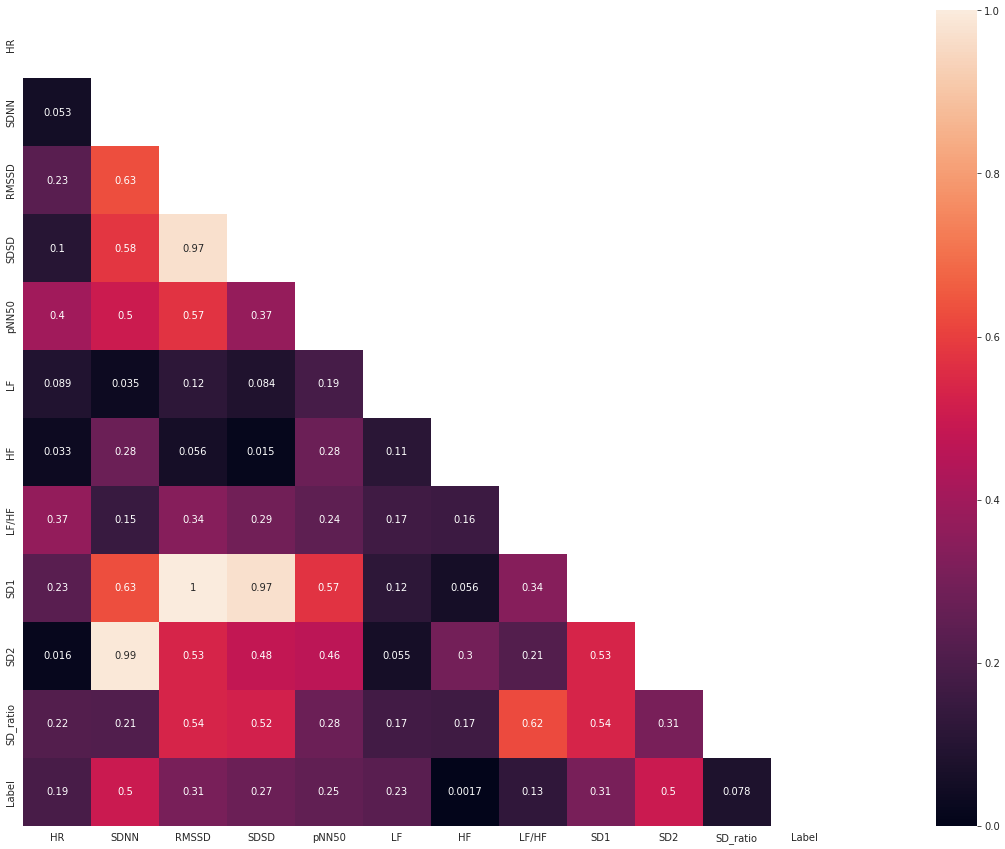

In [7]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = (
    True  # True = generate a mask of lower triangle of matrix
)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35, 15))
    sns.heatmap(data=corr_df, vmin=0, vmax=1, mask=mask, square=True, annot=True)

In [8]:
strong_relation_features = (
    pd.Series(corr_df["Label"]).nlargest(n=9).iloc[1:]
)  # nlargest(n=9)==> take 8 features
strong_relation_features

SDNN     0.499910
SD2      0.498954
RMSSD    0.306164
SD1      0.306149
SDSD     0.274823
pNN50    0.250124
LF       0.231827
HR       0.190235
Name: Label, dtype: float64